#Setup google colab file and import packages

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import numpy as np
import pandas as pd
import seaborn as sns
import re
import scipy
import scipy
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn import linear_model
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from google.colab import files
import math


#Import Dataset

In [ ]:
#wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/144TUqVn1t-T58ytMyMk03MJscgcqCgmfUcqpGX8UNJo/edit#gid=0')
#wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1CYf4IXiftsqv4OFEeSj1sdeRRf0CfMOHQMkXOYqU9T0/edit#gid=0')
#wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1YLUbIJnTk7tdpRUjpsAyb6aliEG1X_1Oy1P-OlBj1pA/edit#gid=0')
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1FgHa7AJ3sATTYDvYVBwzay6e5lm0OSgQohdimqc_K2w/edit#gid=0')
sheet = wb.sheet1
data = sheet.get_all_values()
df = pd.DataFrame(data)
df.columns = df.iloc[0]
merged_dataset = df.iloc[1:]

#reset columns to numeric

merged_dataset['average_kobs'] = merged_dataset['average_kobs'].apply(pd.to_numeric)
merged_dataset['log_average_kobs'] = merged_dataset['log_average_kobs'].apply(pd.to_numeric)
merged_dataset['pH'] = merged_dataset['pH'].apply(pd.to_numeric)
merged_dataset['temp'] = merged_dataset['temp'].apply(pd.to_numeric)
merged_dataset['genome_length'] = merged_dataset['genome_length'].apply(pd.to_numeric)
merged_dataset['diameter'] = merged_dataset['diameter'].apply(pd.to_numeric)




<ipython-input-3-42b8100d6660>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_dataset['average_kobs'] = merged_dataset['average_kobs'].apply(pd.to_numeric)
<ipython-input-3-42b8100d6660>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_dataset['log_average_kobs'] = merged_dataset['log_average_kobs'].apply(pd.to_numeric)
<ipython-input-3-42b8100d6660>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

#Results and Discussion, Section 3.1

In [ ]:
#Section 3.1

#length of dataset
print(f"number of data points is: {len(merged_dataset)}")
#number of viruses
print(f"number of viruses is: {len(merged_dataset.virus_name_strain.unique())}")
#number of families
print(f"number of families points is: {len(merged_dataset.family.unique())}")
#number of baltimore classes
print(f"number of Baltimore classes is: {len(merged_dataset.balt_class.unique())}")


number of data points is: 570
number of viruses is: 82
number of families points is: 18
number of Baltimore classes is: 5


In [ ]:
#show pivot tables for Balt class summary statistics
print(pd.pivot_table(data = merged_dataset, index = 'balt_class', aggfunc=lambda x: len(x))['virus_name_strain'])
pd.pivot_table(data = merged_dataset, index = 'balt_class', aggfunc=lambda x: len(x))['A_percentage']/len(merged_dataset)


balt_class
+ssRNA    408
-ssRNA      7
dsDNA      90
dsRNA      45
ssDNA      20
Name: virus_name_strain, dtype: int64


balt_class
+ssRNA    0.715789
-ssRNA    0.012281
dsDNA     0.157895
dsRNA     0.078947
ssDNA     0.035088
Name: A_percentage, dtype: float64

In [ ]:
#pivot table of virus families
print(pd.pivot_table(data = merged_dataset, index = 'family', aggfunc=lambda x: len(x)).sort_values(by=['A_percentage'], ascending=False).head(5)['A_percentage'])

#pivot table of virus name strain
print(pd.pivot_table(data = merged_dataset, index = 'virus_name_strain', aggfunc=lambda x: len(x)).sort_values(by=['A_percentage'], ascending=False).head(5)['A_percentage'])

#pivot table of virus name strain
print(pd.pivot_table(data = merged_dataset, index = 'balt_class', aggfunc=lambda x: len(x)).sort_values(by=['A_percentage'], ascending=False).head(5)['A_percentage'])


family
Picornaviridae    314
Fiersviridae       72
Adenoviridae       65
Sedoreoviridae     34
Caliciviridae      20
Name: A_percentage, dtype: int64
virus_name_strain
pv 1 mahoney      86
hadv 2            48
ms2               46
cv b5 faulkner    36
echo 1 farouk     29
Name: A_percentage, dtype: int64
balt_class
+ssRNA    408
dsDNA      90
dsRNA      45
ssDNA      20
-ssRNA      7
Name: A_percentage, dtype: int64


In [ ]:
print(f"The minimum k value is: {min(merged_dataset['average_kobs'])}")
print(f"The maximum k value is: {max(merged_dataset['average_kobs'])}")

virus = 'pv 1 mahoney'

#use dataset with only pv 1 mahoney
merg_lim = merged_dataset[merged_dataset['virus_name_strain']== virus]

print(f"The minimum k value for pv 1 Mahoney is: {min(merg_lim['average_kobs'])}")
print(f"The maximum k value for pv 1 Mahoney : {max(merg_lim['average_kobs'])}")




The minimum k value is: 0.01960132671
The maximum k value is: 1146.821051
The minimum k value for pv 1 Mahoney is: 0.07924191906
The maximum k value for pv 1 Mahoney : 315.4340399


In [ ]:
-1.1010555331334906
2.4989085581845063


2.4989085581845063

In [ ]:
merg_lim = merged_dataset[merged_dataset['virus_name_strain']== virus]

print(math.log10(min(merg_lim['average_kobs'])))
print(math.log10(max(merg_lim['average_kobs'])))


-1.101045015376343
2.4989085581845063


In [ ]:
np.max(merged_dataset['log_average_kobs'])

3.059495656

#Figure 1: Inactivation Rate Constants under all Experimental Conditions

In [ ]:
merged_dataset.columns

Index(['virus_name_strain', 'temp', 'pH', 'paper_ID', 'purification_level',
       'sample_ID', 'year', 'author_list', 'buffer_type', 'corr_author',
       'high_chloride', 'buffer_description', 'host_cell', 'high_chloride_new',
       'phosphate_assumption_needed', 'Sample_ID', 'Method_R1', 'Coef_np_R1',
       'Coef_OLS_R1', 'Standard_Error_R1', 'Data_Points_Used_R1', 'Diff_R1',
       'Data_Points_R1', 'smaller_than_R1', 'Method_R2', 'Coef_np_R2',
       'Coef_OLS_R2', 'Standard_Error_R2', 'Data_Points_Used_R2', 'Diff_R2',
       'smaller_than_R2', 'larger_than_R2', 'average_kobs', 'diff',
       'Difference', 'alpha_0', 'buffer', 'balt_class', 'family', 'genus',
       'species', 'structure', 'symmetry', 'tail', 'diameter', 'CG_content',
       'genome_length', 'C_percentage', 'G_percentage', 'A_percentage',
       'T_percentage', 'U_percentage', 'T_is_0', 'U_is_0', 'virus_name_full',
       'virus_name_abbrev', 'first_author', 'first_author_and_year',
       'log_average_kobs', 'y

In [ ]:
merged_dataset_strip = merged_dataset.copy()
merged_dataset_strip['average_kobs'].dtype

dtype('float64')

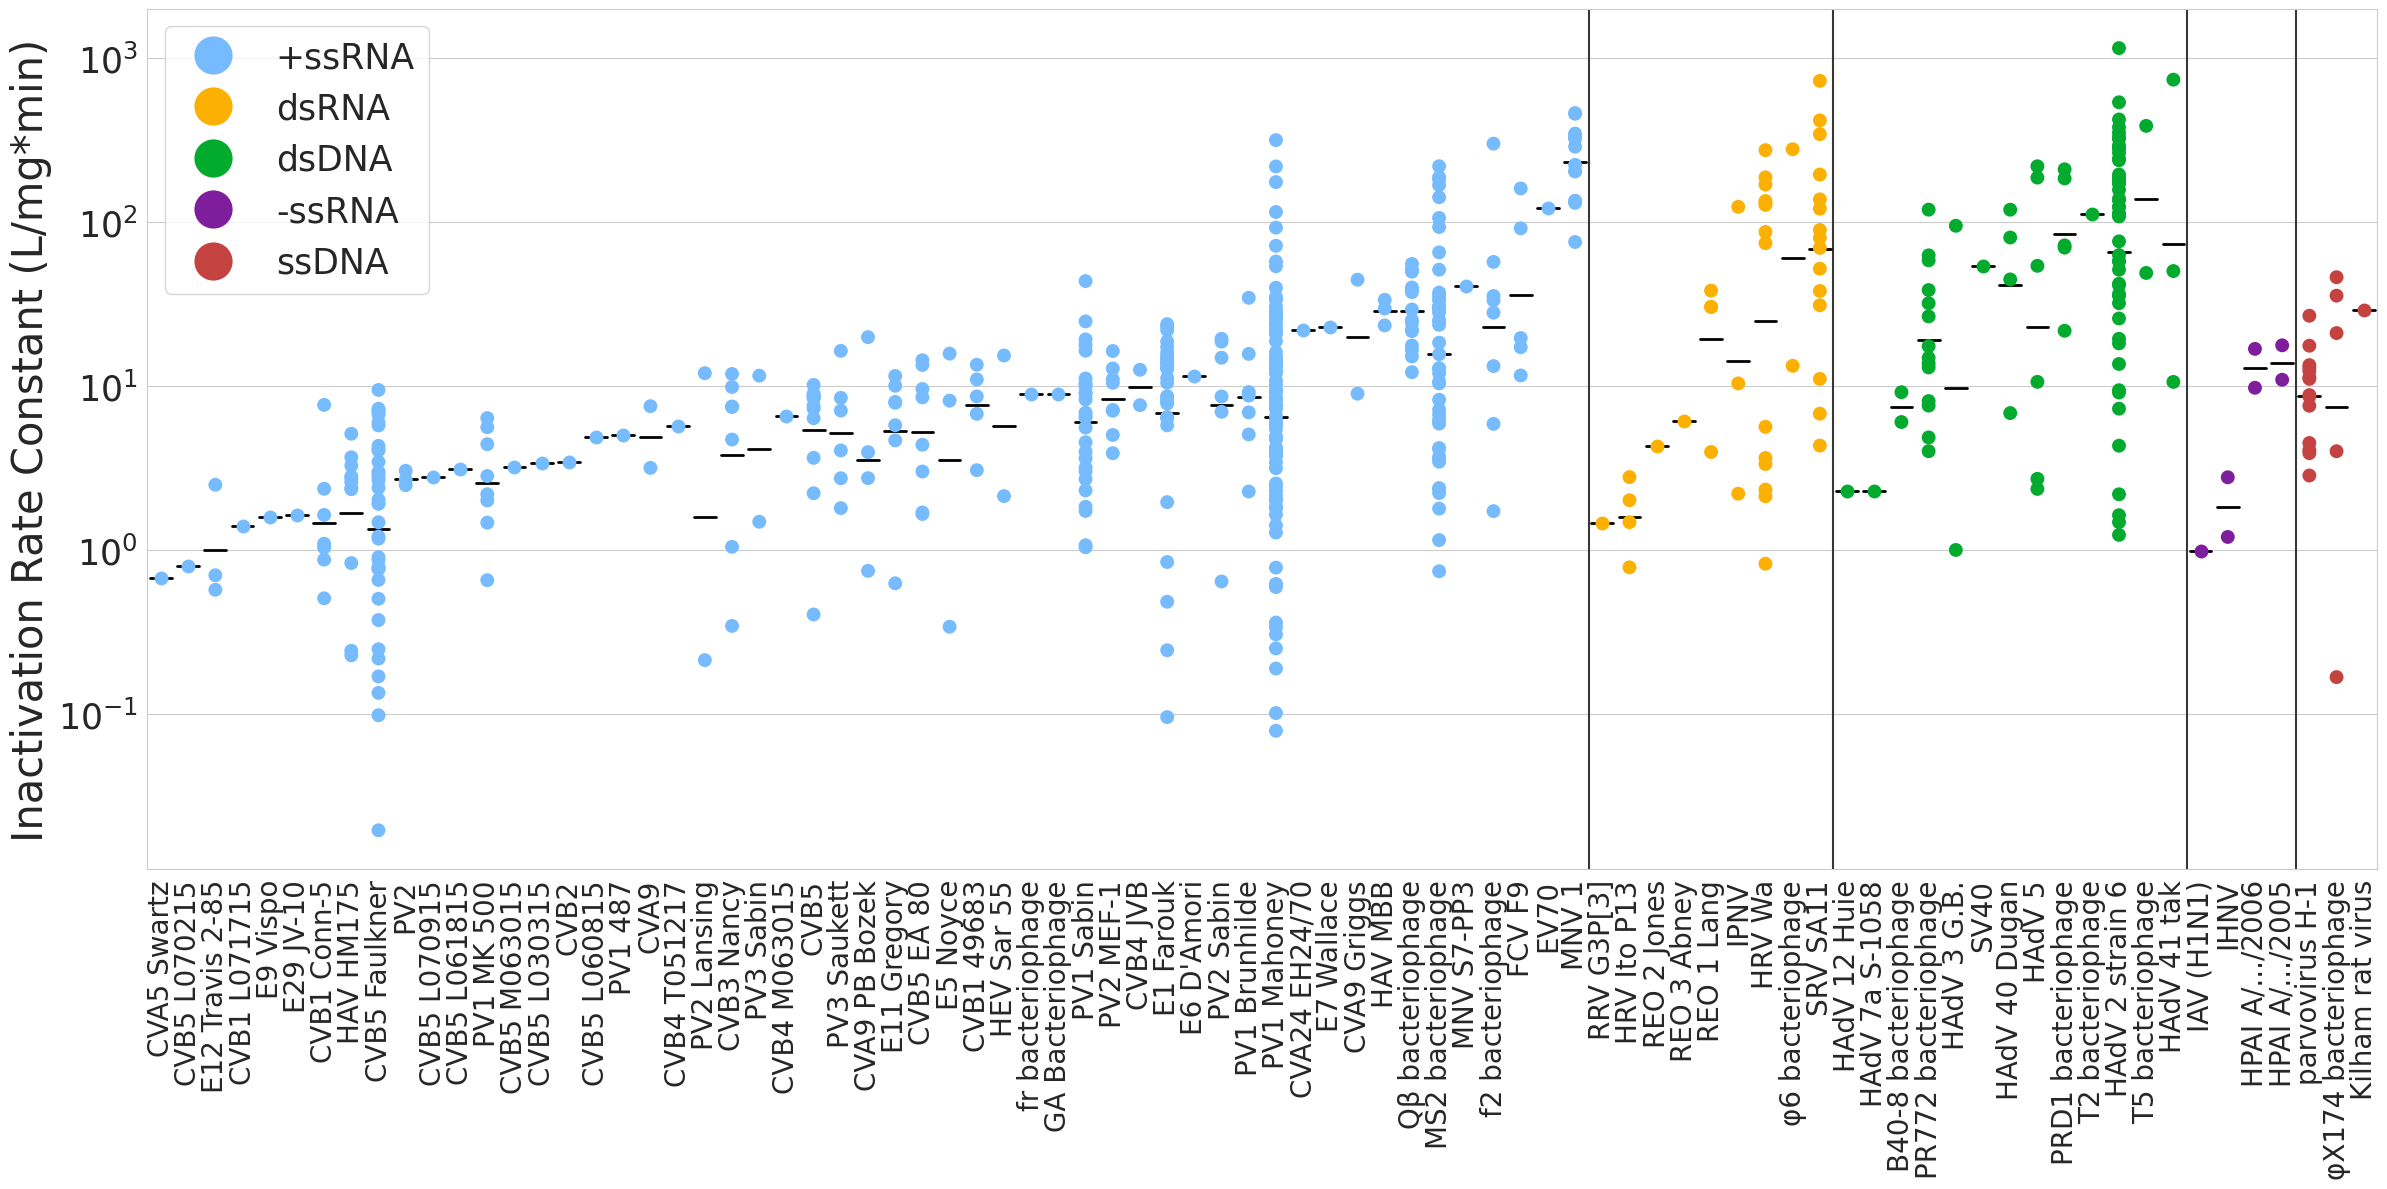

In [ ]:
#strip plot with everything
sns.set_style("whitegrid")
from google.colab import files

merged_dataset_strip = merged_dataset.copy()
merged_dataset_strip = merged_dataset_strip[['balt_class','virus_name_abbrev', 'average_kobs' ]]
k_to_use = "average_kobs"

#from matplotlib import gridspec

#divide virus by genome type
plus_ssRNA_viruses = merged_dataset_strip.loc[merged_dataset_strip['balt_class']=='+ssRNA']
plus_ssRNA_viruses = plus_ssRNA_viruses[['virus_name_abbrev', 'average_kobs']]
plus_ssRNA_ordered_mean = plus_ssRNA_viruses.groupby('virus_name_abbrev').agg(np.mean)[k_to_use].sort_values(ascending = True)
order1 = plus_ssRNA_ordered_mean.index.tolist()


dsRNA_viruses = merged_dataset_strip.loc[merged_dataset_strip['balt_class']=='dsRNA']
dsRNA_viruses = dsRNA_viruses[['virus_name_abbrev', 'average_kobs']]
dsRNA_ordered_mean = dsRNA_viruses.groupby('virus_name_abbrev').agg(np.mean)[k_to_use].sort_values(ascending = True)
order2 = dsRNA_ordered_mean.index.tolist()


dsDNA_viruses = merged_dataset_strip.loc[merged_dataset_strip['balt_class']=='dsDNA']
dsDNA_viruses = dsDNA_viruses[['virus_name_abbrev', 'average_kobs']]
dsDNA_ordered_mean = dsDNA_viruses.groupby('virus_name_abbrev').agg(np.mean)[k_to_use].sort_values(ascending = True)
order3 = dsDNA_ordered_mean.index.tolist()

neg_ssRNA_viruses = merged_dataset_strip.loc[merged_dataset_strip['balt_class']=='-ssRNA']
neg_ssRNA_viruses = neg_ssRNA_viruses[['virus_name_abbrev', 'average_kobs']]
neg_ssRNA_viruses_ordered_mean = neg_ssRNA_viruses.groupby('virus_name_abbrev').agg(np.mean)[k_to_use].sort_values(ascending = True)
order4 = neg_ssRNA_viruses_ordered_mean.index.tolist()

ssDNA_viruses = merged_dataset_strip.loc[merged_dataset_strip['balt_class']=='ssDNA']
ssDNA_viruses = ssDNA_viruses[['virus_name_abbrev', 'average_kobs']]
ssDNA_viruses_ordered_mean = ssDNA_viruses.groupby('virus_name_abbrev').agg(np.mean)[k_to_use].sort_values(ascending = True)
order5 = ssDNA_viruses_ordered_mean.index.tolist()


order = order1 + order2 + order3 + order4 + order5

#make  stripplot
f, ax = plt.subplots( figsize=(24, 12))
ax.set_yscale("log")
D_id_color = {'+ssRNA': u'#75bbfd', 'dsRNA': u'#fcb001', 'dsDNA': u'#02ab2e', '-ssRNA': u'#7e1e9c', 'ssDNA': u'#c44240'}
sns.stripplot(s = 10, data = merged_dataset_strip, x = "virus_name_abbrev", y = k_to_use, order = order, jitter = False, palette=D_id_color, hue = 'balt_class')
#palette=D_id_color

#scale_color_manual(breaks = c("+ssRNA", "dsRNA", "dsDNA","-ssRNA","ssDNA"),
#                      values=c("#75bbfd", "#fcb001", "#02ab2e",  "#7e1e9c", "#c44240")) +


sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            order=order,
            x="virus_name_abbrev",
            y=k_to_use,
            data=merged_dataset_strip,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

#labels and legends
ylabel ="Inactivation Rate Constant (L/mg*min)"
plt.xticks(rotation=90, size = 20)
plt.yticks(size = 25)
ax.set_ylabel(ylabel, fontsize=30)
#ax.legend(  fontsize=20)


plt.rcParams["legend.markerscale"] = 2.75
plt.legend(loc="upper left",  fontsize=25)


ax.set(xlabel=None)
#plt.title('Summary of Virus Inactivation Rates', fontsize = 35)

plt.axvline(52.5, color = 'xkcd:dark grey')
plt.axvline(61.5, color = 'xkcd:dark grey')
plt.axvline(74.5, color = 'xkcd:dark grey')
plt.axvline(78.5, color = 'xkcd:dark grey')


plt.tight_layout()

#plt.savefig("virus_k_stripplot_below_pH8point5.png")
#files.download("virus_k_stripplot_below_pH8point5.png")


In [ ]:
merged_dataset.columns

Index(['virus_name_strain', 'temp', 'pH', 'paper_ID', 'purification_level',
       'sample_ID', 'year', 'author_list', 'buffer_type', 'corr_author',
       'high_chloride', 'buffer_description', 'host_cell', 'high_chloride_new',
       'phosphate_assumption_needed', 'Sample_ID', 'Method_R1', 'Coef_np_R1',
       'Coef_OLS_R1', 'Standard_Error_R1', 'Data_Points_Used_R1', 'Diff_R1',
       'Data_Points_R1', 'smaller_than_R1', 'Method_R2', 'Coef_np_R2',
       'Coef_OLS_R2', 'Standard_Error_R2', 'Data_Points_Used_R2', 'Diff_R2',
       'smaller_than_R2', 'larger_than_R2', 'average_kobs', 'diff',
       'Difference', 'alpha_0', 'buffer', 'balt_class', 'family', 'genus',
       'species', 'structure', 'symmetry', 'tail', 'diameter', 'CG_content',
       'genome_length', 'C_percentage', 'G_percentage', 'A_percentage',
       'T_percentage', 'U_percentage', 'T_is_0', 'U_is_0', 'virus_name_full',
       'virus_name_abbrev', 'first_author', 'first_author_and_year',
       'log_average_kobs', 'y

#Revisions: create dataframe with all abbreviations

In [ ]:
#virus_abbreviations = merged_dataset[['virus_name_full','virus_name_abbrev']]
#virus_abbreviations

#merged_dataset.groupby("virus_name_full").agg({
#    "virus_name_abbrev": "first",
#    "first_author_and_year": lambda x: list(set(x)),
#    "paper_ID": lambda x: list(set(x))
#}).reset_index()

virus_abbreviations = merged_dataset.groupby("virus_name_full").agg({
    "virus_name_abbrev": "first"
}).reset_index()



In [ ]:
import os
os.getcwd()

from google.colab import files

values = [virus_abbreviations.columns.values.tolist()] + virus_abbreviations.values.tolist()

sheet = gc.create('virus_abbreviations.xlsx').sheet1
sheet.update(values)


{'spreadsheetId': '1okxICO3S7Yo73f5oO5w7FqoVo1ZdhJxXPpD7oYnSR3o',
 'updatedRange': 'Sheet1!A1:B83',
 'updatedRows': 83,
 'updatedColumns': 2,
 'updatedCells': 166}

#For Table 1: Number of Rate Constants for Waterborne Viruses of Concern

In [ ]:
(np.unique(merged_dataset['genus']))

pd.pivot_table(data = merged_dataset, index = 'family', aggfunc=lambda x: len(x))

adenoviruses = merged_dataset[merged_dataset['genus']=='Mastadenovirus']
print("Mastadenovirus")
print((np.unique(adenoviruses['virus_name_strain'])))
print(len(np.unique(adenoviruses['virus_name_strain'])))
print(len(adenoviruses['virus_name_strain']))

norovirus = merged_dataset[merged_dataset['genus']=='Norovirus']
print("Norovirus")
print((np.unique(norovirus['virus_name_strain'])))
print(len(np.unique(norovirus['virus_name_strain'])))
print(len(norovirus['virus_name_strain']))


enteroviruses = merged_dataset[merged_dataset['genus']=='Enterovirus']
print("Enterovirus")
print((np.unique(enteroviruses['virus_name_strain'])))
print(len(np.unique(enteroviruses['virus_name_strain'])))
print(len(enteroviruses['virus_name_strain']))

hepatovirus = merged_dataset[merged_dataset['genus']=='Hepatovirus']
print("Hepatovirus")
print((np.unique(hepatovirus['virus_name_strain'])))
print(len(np.unique(hepatovirus['virus_name_strain'])))
print(len(hepatovirus['virus_name_strain']))


rotavirus = merged_dataset[merged_dataset['genus']=='Rotavirus']
print("Rotavirus")
print((np.unique(rotavirus['virus_name_strain'])))
print(len(np.unique(rotavirus['virus_name_strain'])))
print(len(rotavirus['virus_name_strain']))

orthoreovirus = merged_dataset[merged_dataset['genus']=='Orthoreovirus']
print("Orthoreovirus")
print((np.unique(orthoreovirus['virus_name_strain'])))
print(len(np.unique(orthoreovirus['virus_name_strain'])))
print(len(orthoreovirus['virus_name_strain']))



Mastadenovirus
['hadv 12 huie' 'hadv 2' 'hadv 3 g.b.' 'hadv 40 dugan' 'hadv 41 tak'
 'hadv 5' 'hadv 7a']
7
65
Norovirus
['mnv 1' 'mnv s7-pp3']
2
15
Enterovirus
['cv a24' 'cv a5 swartz' 'cv a9' 'cv a9 griggs' 'cv a9 pb bozek'
 'cv b1 49683' 'cv b1 conn-5' 'cv b1 l071715' 'cv b2' 'cv b3 nancy'
 'cv b4 jvb' 'cv b4 m063015' 'cv b4 t051217' 'cv b5' 'cv b5 ea 80'
 'cv b5 faulkner' 'cv b5 l030315' 'cv b5 l060815' 'cv b5 l061815'
 'cv b5 l070215' 'cv b5 l070915' 'cv b5 m063015' 'echo 1 farouk'
 'echo 11 gregory' 'echo 12 travis' 'echo 29 jv-10' 'echo 5 noyce'
 "echo 6 d'amori" 'echo 7 wallace' 'echo 9 vispo' 'entero 70' 'pv 1 487'
 'pv 1 brunhilde' 'pv 1 mahoney' 'pv 1 mk 500' 'pv 1 sabin' 'pv 2'
 'pv 2 lansing' 'pv 2 mef-1' 'pv 2 sabin' 'pv 3 sabin' 'pv 3 saukett']
42
300
Hepatovirus
['hep a hm175' 'hep a mbb']
2
14
Rotavirus
['hrv ito p13' 'hrv wa' 'rrv g3p[3]' 'simian rotavirus sa11']
4
34
Orthoreovirus
['reo 1 lang' 'reo 2 jones' 'reo 3 abney']
3
6


#Figure S5.1: Heatmaps

In [ ]:
from matplotlib.colors import LogNorm

In [ ]:
#heatmap by full pH value
merged_dataset_range_pH1s = merged_dataset.copy()

merged_dataset_range_pH1s['pH'].replace(to_replace=[4.5, 5],value="4-5", inplace = True)
merged_dataset_range_pH1s['pH'].replace(to_replace=[5.1,5.4, 5.6,5.7,6],value="5-6", inplace = True)
merged_dataset_range_pH1s['pH'].replace(to_replace=[6.3,6.5,6.52, 6.7, 6.8, 6.9,7],value="6-7", inplace = True)
merged_dataset_range_pH1s['pH'].replace(to_replace=[7.1, 7.2, 7.3, 7.4, 7.5,7.6, 7.8,8],value="7-8", inplace = True)
merged_dataset_range_pH1s['pH'].replace(to_replace=[8.1, 8.2, 8.3, 8.5, 8.7,9],value="8-9", inplace = True)
merged_dataset_range_pH1s['pH'].replace(to_replace=[9.2, 9.6,9.8,9.9,10],value="9-10", inplace = True)

#plt.style.use("seaborn")

heatmap_data_pH1s = pd.pivot_table(merged_dataset_range_pH1s, values='sample_ID', index='pH', columns = 'balt_class',
                    aggfunc=lambda x: len(x))

# Plot the heatmap
#plt.figure(figsize=(10,10))
#heat_map = sns.heatmap( heatmap_data_pH1s, linewidth = 1 , annot = True, fmt ='.3g', cmap = 'crest', norm=LogNorm(), vmin =0, vmax = 100)
#heat_map.set_facecolor('xkcd:light grey')
#plt.title( "Number of Available Rate Constants" )
#plt.show()

In [ ]:
#plt.style.use("seaborn")

heatmap_data_chloride = pd.pivot_table(merged_dataset, values='sample_ID', index='high_chloride', columns = 'balt_class',
                    aggfunc=lambda x: len(x))

# Plot the heatmap
#plt.figure()
#heat_map = sns.heatmap( heatmap_data_chloride, linewidth = 1 , annot = True, fmt ='.3g', cmap = 'crest', norm=LogNorm())

#plt.title( "Number of Available Rate Constants" )
#plt.show()

In [ ]:
#heatmap by 10, starting at 5s

#https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f

from matplotlib.colors import LogNorm


merged_dataset_range_10temp = merged_dataset.copy()

merged_dataset_range_10temp['temp'].replace(to_replace=[0,1,2,3,4,5],value="0 - 5", inplace = True)
merged_dataset_range_10temp['temp'].replace(to_replace=[10, 14, 15],value="5-15", inplace = True)
merged_dataset_range_10temp['temp'].replace(to_replace=[16,17,18,20, 21,22,22.5,23.5,25],value="15-25", inplace = True)
merged_dataset_range_10temp['temp'].replace(to_replace=[ 25.5,26.5,30, 35],value="25-35", inplace = True)

#plt.style.use("seaborn")

heatmap_data_temp_10deg = pd.pivot_table(merged_dataset_range_10temp, values='sample_ID', index='temp', columns = 'balt_class',
                    aggfunc=lambda x: len(x))

heatmap_data_temp_10deg = heatmap_data_temp_10deg.reindex(["0 - 5", "5-15", "15-25", "25-35"])


# Plot the heatmap
#plt.figure(figsize=(10,10))
#heatmap_temp_10deg = sns.heatmap( heatmap_data_temp_10deg, linewidth = 1 , annot = True, fmt ='.3g', cmap = 'BuGn', norm=LogNorm())
#plt.title( "Number of Available Rate Constants" )
#plt.show()




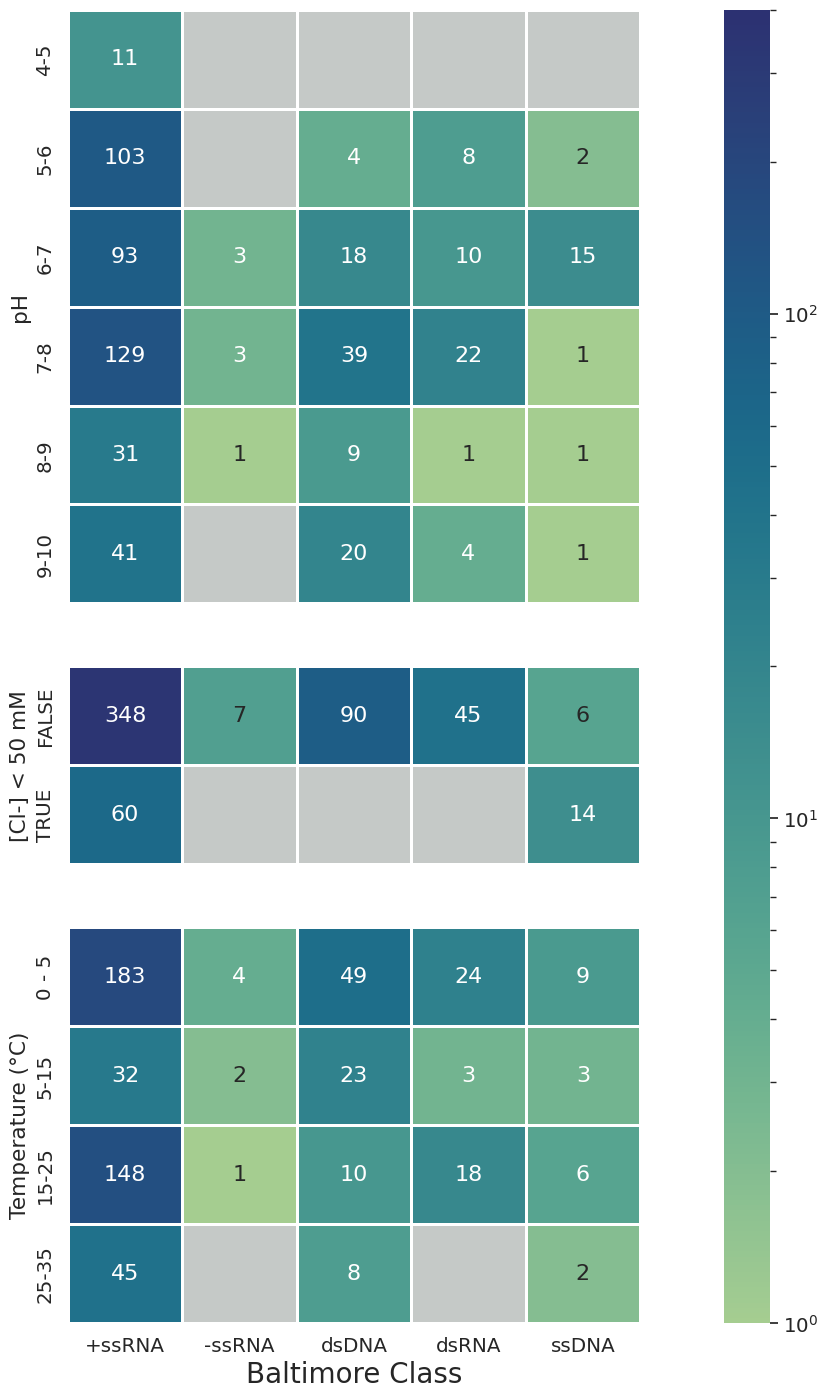

In [ ]:
f, ax = plt.subplot_mosaic([['upper left', 'right'],
                  ['middle left', 'right'],
                   ['lower left', 'right']],
                              figsize=(8, 14), gridspec_kw={'height_ratios': [3, 1, 2], 'width_ratios':[1, 0.08]})

plt.tight_layout()


sns.set(font_scale=1.3)
#f, ax = plt.subplots( figsize=(20, 12))
#ax[0].set_ylim(1e-2, 1e3)
heat_map_pH = sns.heatmap( heatmap_data_pH1s, ax = ax['upper left'], linewidth = 1 , annot = True, fmt ='.3g', cmap = 'crest', norm = LogNorm(),cbar=False, xticklabels='',  annot_kws={"fontsize":16})
ax['upper left'].set_xticklabels(heat_map_pH.get_xticklabels(), fontsize=25)
ax['upper left'].set_facecolor('xkcd:silver')
ax['upper left'].set_xlabel('')
ax['upper left'].set_ylabel('pH')
ax['upper left'].collections[0].set_clim(1,400)
ax['upper left'].grid(False)



#sns.stripplot(ax = ax[0], s = 15, data = plus_ssRNA_viruses, x = "virus_name_strain", y = k_to_use, order = order, jitter = False, palette="muted", hue = 'family')

heat_map_chloride = sns.heatmap( heatmap_data_chloride, ax = ax['middle left'], linewidth = 1 , annot = True, fmt ='.3g', cmap = 'crest', norm = LogNorm(), cbar=False, xticklabels='',  annot_kws={"fontsize":16})
ax['middle left'].set_facecolor('xkcd:silver')
ax['middle left'].set_xlabel('')
ax['middle left'].set_ylabel('[Cl-] < 50 mM')
ax['middle left'].collections[0].set_clim(1,400)
ax['middle left'].grid(False)


heatmap_10deg = sns.heatmap( heatmap_data_temp_10deg, ax = ax['lower left'], linewidth = 1 , annot = True, fmt ='.3g', cmap = 'crest',  norm = LogNorm(), cbar_ax=ax['right'],  annot_kws={"fontsize":16})
ax['lower left'].set_facecolor('xkcd:silver')
ax['lower left'].set_xlabel('Baltimore Class', size = 20)
ax['lower left'].set_ylabel('Temperature (°C)')
ax['lower left'].collections[0].set_clim(1,400)
ax['lower left'].grid(False)




#Figure S6.1 Data Comparison under Narrowed Environmental Conditions


In [ ]:
merged_dataset_limited = merged_dataset.copy()

#set temperature limit
temp_min = 15
temp_max = 25
merged_dataset_limited = merged_dataset_limited[merged_dataset_limited["temp"]>=temp_min]
merged_dataset_limited = merged_dataset_limited[merged_dataset_limited["temp"]<=temp_max]
print(f"Temperatures between {temp_min} and {temp_max}")


#set pH limit
pH_min = 6
pH_max = 7
merged_dataset_limited = merged_dataset_limited[merged_dataset_limited["pH"]>=pH_min]
merged_dataset_limited = merged_dataset_limited[merged_dataset_limited["pH"]<=pH_max]
print(f"pH values between {pH_min} and {pH_max}")

print(f"{len(merged_dataset_limited)} data points included")
print(f"{len(merged_dataset)} data points included in base")
print(f"{len(np.unique(merged_dataset_limited['virus_name_strain']))} viruses included")



Temperatures between 15 and 25
pH values between 6 and 7
94 data points included
570 data points included in base
28 viruses included


In [ ]:
len(merged_dataset_strip)

570

In [ ]:
sorted(merged_dataset_strip.columns)

['average_kobs', 'balt_class', 'virus_name_abbrev']

<ipython-input-26-6f6d12a1b6e9>:10: FutureWarning: The operation <function mean at 0x7ccbc45eb010> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  all_viruses_ordered_mean = all_viruses.groupby('virus_name_abbrev').agg(np.mean)[k_to_use].sort_values(ascending = True)
<ipython-input-26-6f6d12a1b6e9>:60: FutureWarning: The operation <function mean at 0x7ccbc45eb010> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  all_viruses_ordered_mean_2 = all_viruses_2.groupby('virus_name_abbrev').agg(np.mean)[k_to_use].sort_values(ascending = True)


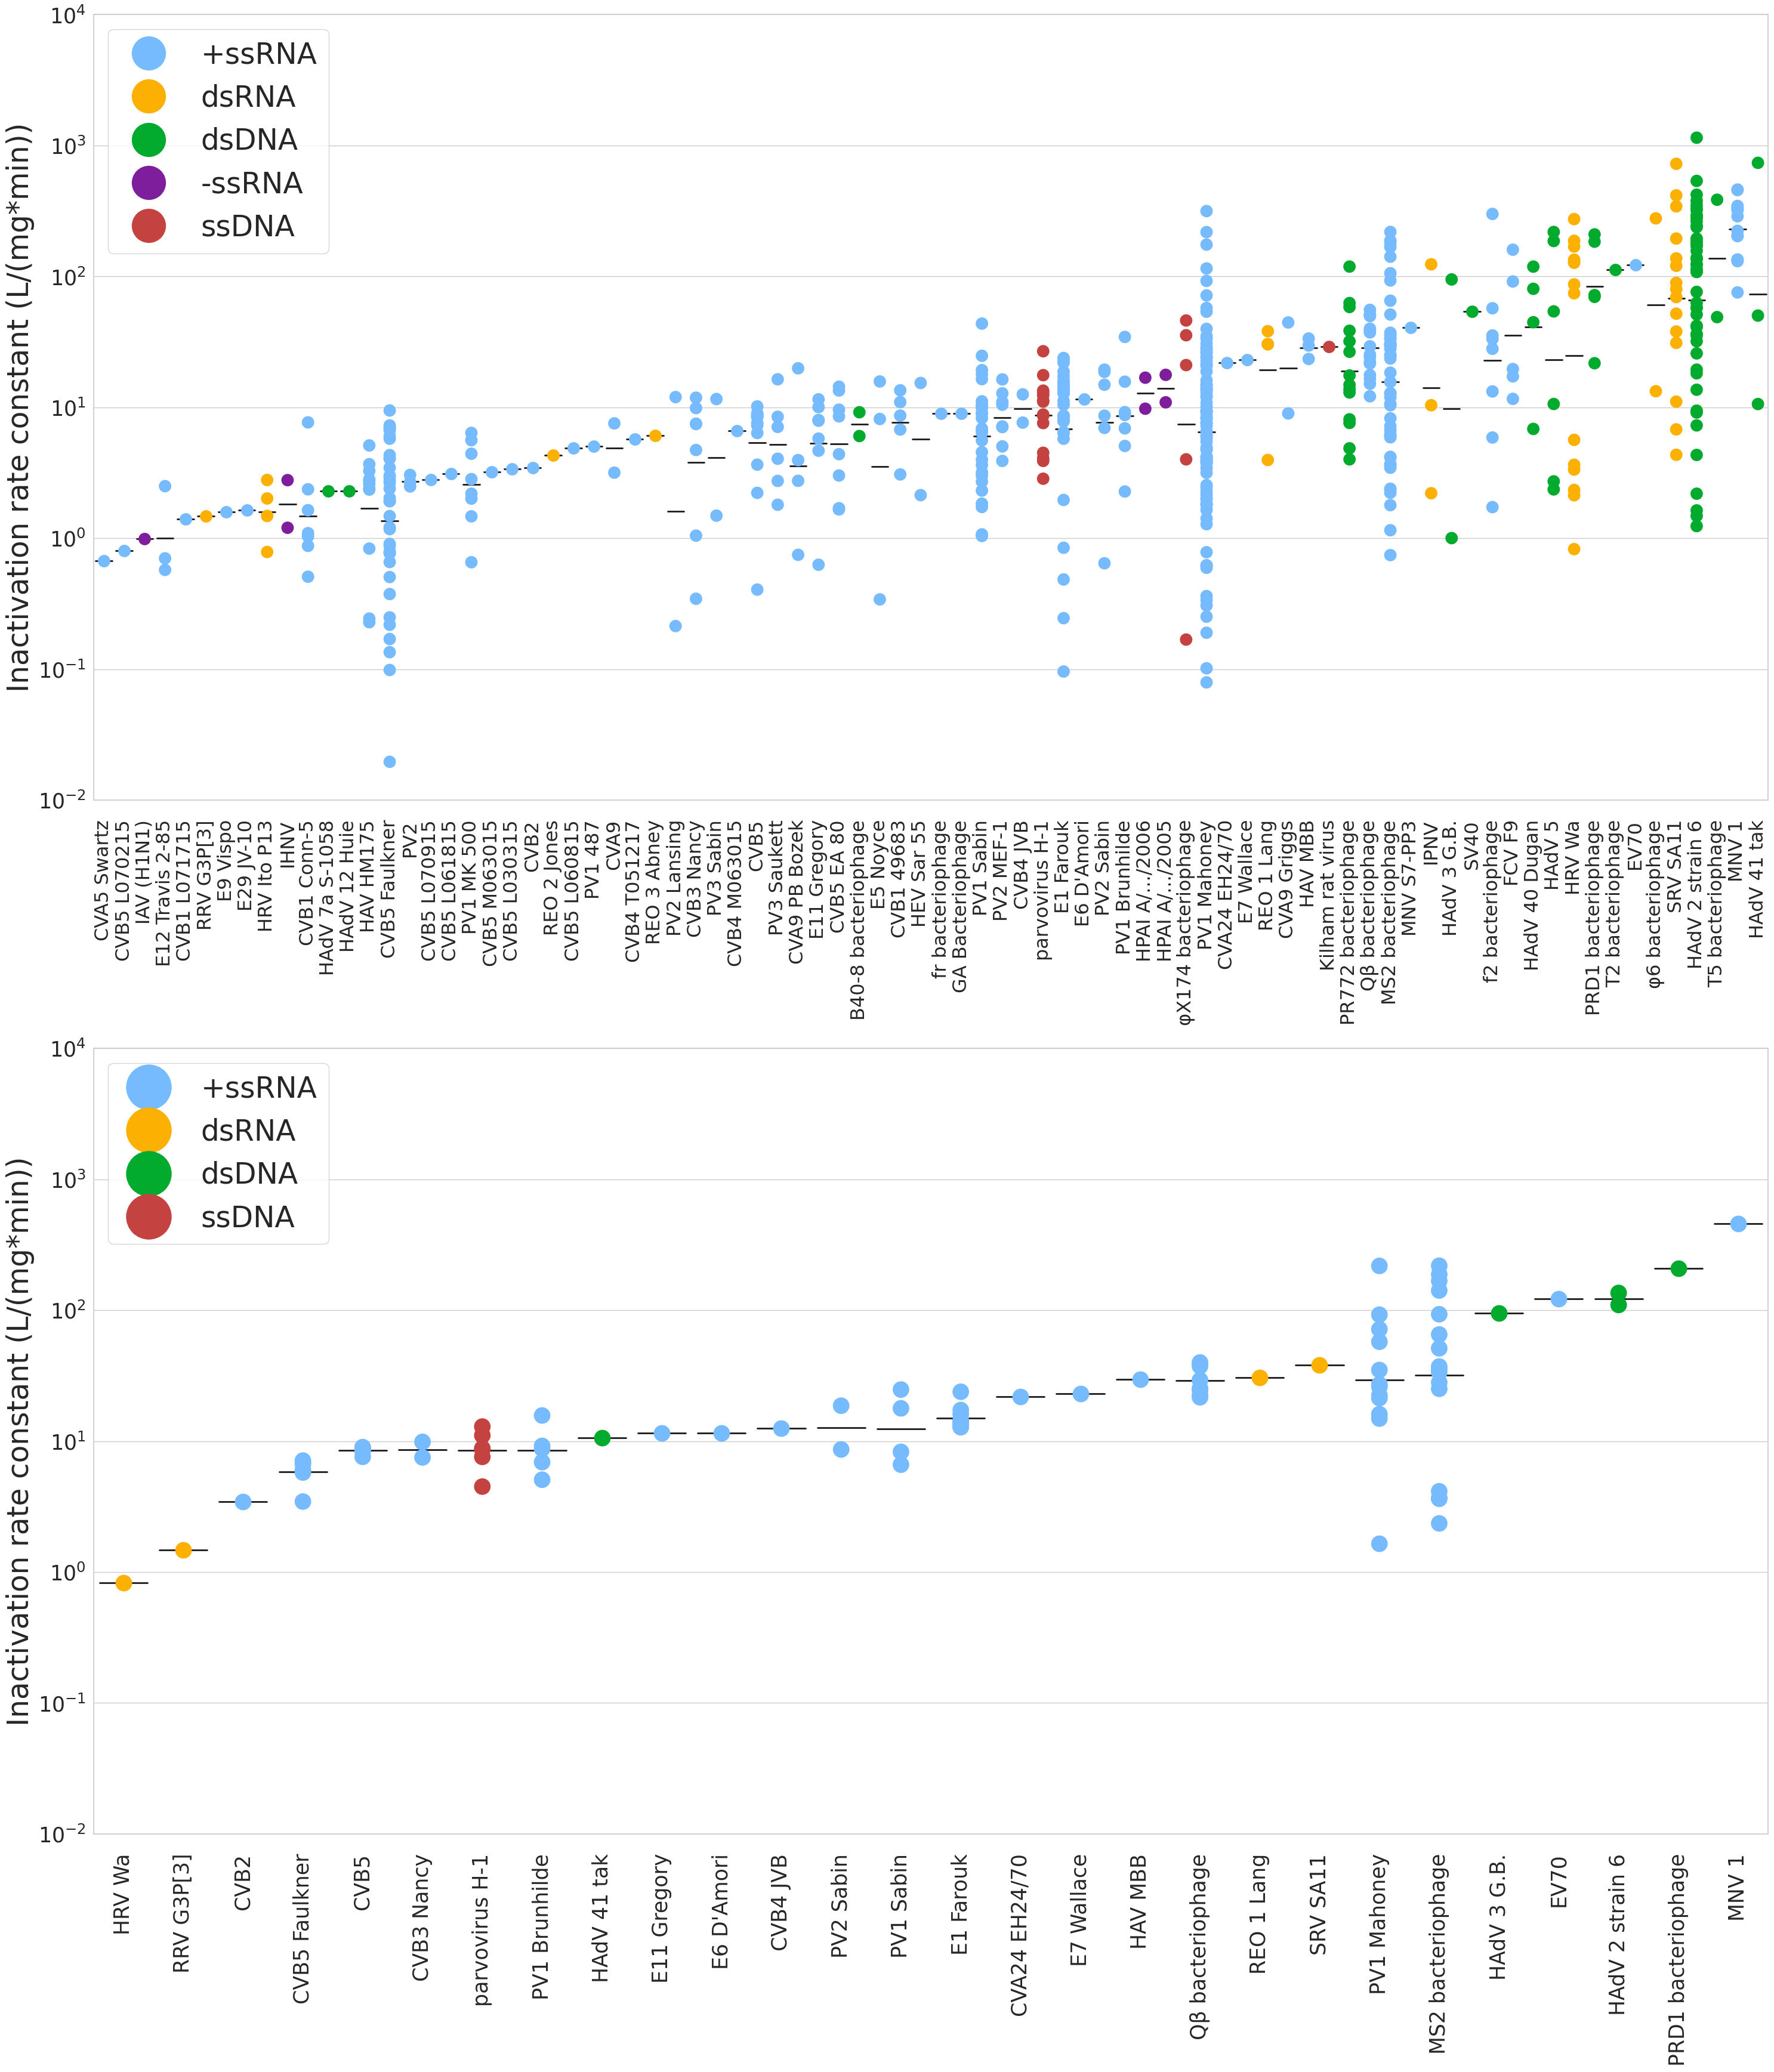

In [ ]:
#two conditions plotted together
sns.set_style("whitegrid")

merged_dataset_strip = merged_dataset
k_to_use = "average_kobs"

############### plot all viruses
#divide virus by genome type
all_viruses = merged_dataset_strip
all_viruses_ordered_mean = all_viruses.groupby('virus_name_abbrev').agg(np.mean)[k_to_use].sort_values(ascending = True)
order = all_viruses_ordered_mean.index.tolist()

#make  stripplot
f, ax = plt.subplots(2,1,  figsize=(30, 35))
#f, ax = plt.subplots( figsize=(20, 12))
ax[0].set_yscale("log")
ax[0].set_ylim(1e-2, 1e4)
D_id_color = {'+ssRNA': u'#75bbfd', 'dsRNA': u'#fcb001', 'dsDNA': u'#02ab2e', '-ssRNA': u'#7e1e9c', 'ssDNA': u'#c44240'}
sns.stripplot(ax = ax[0], s = 15, data = all_viruses, x = "virus_name_abbrev", y = k_to_use, order = order, jitter = False, palette=D_id_color, hue = 'balt_class')

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            order=order,
            x="virus_name_abbrev",
            y=k_to_use,
            data=all_viruses,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax[0])

#labels and legends
ylabel ="Inactivation rate constant (L/(mg*min))"
ax[0].tick_params(axis="x", rotation=90, size = 20, labelsize = 23)
ax[0].tick_params(axis="y", labelsize = 25)
#ax[0].set_xticklabels(plus_ssRNA_viruses['virus_name_strain'], Fontsize= 20)
ax[0].set_ylabel(ylabel, fontsize=35)
ax[0].legend( prop={'size': 35})
ax[0].set(xlabel=None)
#ax[0].set_title('All conditions')
#plt.title('Summary of Virus Inactivation Rates', fontsize = 35)

plt.tight_layout()



################ cond 2

k_to_use = "average_kobs"

#make names shorter

#from matplotlib import gridspec

#divide virus by genome type
all_viruses_2 = merged_dataset_limited
all_viruses_ordered_mean_2 = all_viruses_2.groupby('virus_name_abbrev').agg(np.mean)[k_to_use].sort_values(ascending = True)
order2 = all_viruses_ordered_mean_2.index.tolist()

order = order2

#make  stripplot
ax[1].set_yscale("log")
ax[1].set_ylim(1e-2, 1e4)
D_id_color = {'+ssRNA': u'#75bbfd', 'dsRNA': u'#fcb001', 'dsDNA': u'#02ab2e', '-ssRNA': u'#7e1e9c', 'ssDNA': u'#c44240'}
sns.stripplot(ax = ax[1], s = 20, data = all_viruses_2, x = "virus_name_abbrev", y = k_to_use, order = order, jitter = False, palette=D_id_color, hue = 'balt_class')

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            order=order,
            x="virus_name_abbrev",
            y=k_to_use,
            data=all_viruses_2,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax[1])

#labels and legends
ylabel ="Inactivation rate constant (L/(mg*min))"
ax[1].tick_params(axis="x", rotation=90, size = 20, labelsize = 25)
ax[1].tick_params(axis="y", labelsize = 25)
ax[1].set_ylabel(ylabel, fontsize=35)
ax[1].legend( prop={'size': 35})
ax[1].set(xlabel=None)
#ax[1].set_title('Condition Set 2')

#plt.title('Summary of Virus Inactivation Rates', fontsize = 35)

plt.tight_layout()

plt.savefig("all_cond.png")
#files.download("all_cond.png")


##Text on Narrowed Environmental Conditions from Section 3.1

In [ ]:
#merged_dataset.groupby('virus_name_strain').agg('count')['temp'].sort_values

#make a function to sort dataset by whatever parameters provided above, print plots
ms2_rates_orig = merged_dataset[merged_dataset['virus_name_strain']=='ms2']
ms2_rates_limited = merged_dataset_limited[merged_dataset_limited['virus_name_strain']=='ms2']

point_num = len(ms2_rates_limited)
print(f" number of points (limited): {point_num}")

paper_num = len(ms2_rates_limited.groupby('paper_ID').agg('count'))
print(f" number of papers (limited): {paper_num}")

mean_k = np.mean(ms2_rates_orig['average_kobs'])
print(f" mean k value (orig): {mean_k}")

mean_k = np.mean(ms2_rates_limited['average_kobs'])
print(f" mean k value (limited): {mean_k}")

mean_std = np.std(ms2_rates_orig['average_kobs'])
print(f" ms2 standard deviation of k value (orig): {mean_std}")

mean_std = np.std(ms2_rates_limited['average_kobs'])
print(f" ms2 standard deviation of k value (limited): {mean_std}")


pv1_rates_orig = merged_dataset[merged_dataset['virus_name_strain']=='pv 1 mahoney']
pv1_rates_limited = merged_dataset_limited[merged_dataset_limited['virus_name_strain']=='pv 1 mahoney']
mean_std = np.std(pv1_rates_orig['average_kobs'])
print(f" pv 1 mahoney standard deviation of k value (orig): {mean_std}")

mean_std = np.std(pv1_rates_limited['average_kobs'])
print(f" pv 1 mahoney standard deviation of k value (limited): {mean_std}")



 number of points (limited): 16
 number of papers (limited): 6
 mean k value (orig): 38.4020021713587
 mean k value (limited): 68.6266999399375
 ms2 standard deviation of k value (orig): 54.49419271892547
 ms2 standard deviation of k value (limited): 69.13923919508738
 pv 1 mahoney standard deviation of k value (orig): 46.4145267787532
 pv 1 mahoney standard deviation of k value (limited): 56.379107063170466


# Table S8.1 Genome Length and Diameter by Baltimore Class

#Tailing Analysis

In [ ]:
merged_dataset_tailing = merged_dataset[merged_dataset['Data_Points_R1'] > merged_dataset['Data_Points_Used_R1']]

In [ ]:
merged_dataset_tailing

,virus_name_strain,temp,pH,paper_ID,purification_level,sample_ID,year,author_list,buffer_type,corr_author,...,virus_name_full,virus_name_abbrev,first_author,first_author_and_year,log_average_kobs,year_float,year_int,float_year_scaled,int_year_scaled,host_grouping
2,echo 11 gregory,20.0,7.5,2,2,2-2,2020,"['young_s', 'torrey_j', 'bachmann_v', 'kohn_t']",phosphate saline,kohn_t,...,echovirus 11 Gregory,E11 Gregory,young_s,young_s 2020,0.668699,2020,2020,3.1,3.1,BGMK
5,cv b5 faulkner,10.0,7.0,5,2,5-1,2019,"['wati_s', 'robinson_b', 'mieog_j', 'blackbear...",wastewater,keegan_a,...,coxsackievirus B5 Faulkner,CVB5 Faulkner,wati_s,wati_s 2019,0.082590,2019,2019,3,3,BGMK
7,cv b5 faulkner,10.0,9.0,5,2,5-3,2019,"['wati_s', 'robinson_b', 'mieog_j', 'blackbear...",wastewater,keegan_a,...,coxsackievirus B5 Faulkner,CVB5 Faulkner,wati_s,wati_s 2019,-0.870045,2019,2019,3,3,BGMK
10,rrv g3p[3],20.0,7.0,6,3,6-1,2019,"['kadoya_s', 'nishimura_o', 'kato_h', 'sano_d']",phosphate saline,sano_d,...,rhesus rotavirus G3P[3],RRV G3P[3],kadoya_s,kadoya_s 2019,0.167893,2019,2019,3,3,MA104
22,phi 6,20.0,7.4,8,1,8-1,2018,"['ye_y', 'chang_p', 'hartert_j', 'wigginton_k']",phosphate saline,wigginton_k,...,φ6 bacteriophage,φ6 bacteriophage,ye_y,ye_y 2018,2.443259,2018,2018,2.9,2.9,P. syringae
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,pv 1 mahoney,21.0,7.1,79,1,79-3,1980,"['shaffer_p', 'metcalf_t', 'sproul_o']",calcium,shaffer_p,...,poliovirus 1 Mahoney,PV1 Mahoney,shaffer_p,shaffer_p 1980,0.763513,1980,1980,-0.9,-0.9,LLC-MK2
557,pv 1 sabin,21.0,7.1,79,1,79-4,1980,"['shaffer_p', 'metcalf_t', 'sproul_o']",calcium,shaffer_p,...,poliovirus 1 Sabin,PV1 Sabin,shaffer_p,shaffer_p 1980,1.215322,1980,1980,-0.9,-0.9,LLC-MK2
558,pv 1 sabin,21.0,7.1,79,1,79-5,1980,"['shaffer_p', 'metcalf_t', 'sproul_o']",calcium,shaffer_p,...,poliovirus 1 Sabin,PV1 Sabin,shaffer_p,shaffer_p 1980,0.502550,1980,1980,-0.9,-0.9,LLC-MK2
559,pv 1 sabin,21.0,7.1,79,1,79-6,1980,"['shaffer_p', 'metcalf_t', 'sproul_o']",calcium,shaffer_p,...,poliovirus 1 Sabin,PV1 Sabin,shaffer_p,shaffer_p 1980,0.657310,1980,1980,-0.9,-0.9,LLC-MK2


#Probability Distribution

In [ ]:
merged_dataset.columns

Index(['virus_name_strain', 'temp', 'pH', 'paper_ID', 'purification_level',
       'sample_ID', 'year', 'author_list', 'buffer_type', 'corr_author',
       'high_chloride', 'buffer_description', 'host_cell', 'high_chloride_new',
       'phosphate_assumption_needed', 'Sample_ID', 'Method_R1', 'Coef_np_R1',
       'Coef_OLS_R1', 'Standard_Error_R1', 'Data_Points_Used_R1', 'Diff_R1',
       'Data_Points_R1', 'smaller_than_R1', 'Method_R2', 'Coef_np_R2',
       'Coef_OLS_R2', 'Standard_Error_R2', 'Data_Points_Used_R2', 'Diff_R2',
       'smaller_than_R2', 'larger_than_R2', 'average_kobs', 'diff',
       'Difference', 'alpha_0', 'buffer', 'balt_class', 'family', 'genus',
       'species', 'structure', 'symmetry', 'tail', 'diameter', 'CG_content',
       'genome_length', 'C_percentage', 'G_percentage', 'A_percentage',
       'T_percentage', 'U_percentage', 'T_is_0', 'U_is_0', 'virus_name_full',
       'virus_name_abbrev', 'first_author', 'first_author_and_year',
       'log_average_kobs', 'y

In [ ]:
sum(merged_dataset.groupby('paper_ID').agg('nunique')["high_chloride_new"]>1)

7

# New Section

In [ ]:
#from fitter import Fitter, get_common_distributions, get_distributions

In [ ]:
merged_dataset.columns

Index(['virus_name_strain', 'temp', 'pH', 'paper_ID', 'purification_level',
       'sample_ID', 'year', 'author_list', 'buffer_type', 'corr_author',
       'high_chloride', 'buffer_description', 'host_cell', 'high_chloride_new',
       'phosphate_assumption_needed', 'Sample_ID', 'Method_R1', 'Coef_np_R1',
       'Coef_OLS_R1', 'Standard_Error_R1', 'Data_Points_Used_R1', 'Diff_R1',
       'Data_Points_R1', 'smaller_than_R1', 'Method_R2', 'Coef_np_R2',
       'Coef_OLS_R2', 'Standard_Error_R2', 'Data_Points_Used_R2', 'Diff_R2',
       'smaller_than_R2', 'larger_than_R2', 'average_kobs', 'diff',
       'Difference', 'alpha_0', 'buffer', 'balt_class', 'family', 'genus',
       'species', 'structure', 'symmetry', 'tail', 'diameter', 'CG_content',
       'genome_length', 'C_percentage', 'G_percentage', 'A_percentage',
       'T_percentage', 'U_percentage', 'T_is_0', 'U_is_0', 'virus_name_full',
       'virus_name_abbrev', 'first_author', 'first_author_and_year',
       'log_average_kobs', 'y

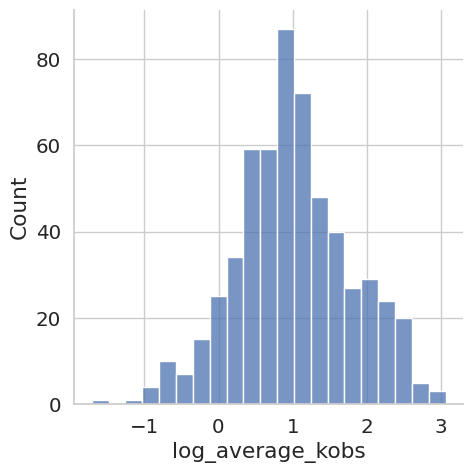

In [ ]:
sns.displot(data=merged_dataset, x="log_average_kobs", kind="hist")

log_average_kobs = merged_dataset["log_average_kobs"].values

average_kobs = merged_dataset["average_kobs"].values

In [ ]:

f = Fitter(log_average_kobs,
           distributions=['lognorm', 'norm'])
f.fit()
f.summary()

NameError: name 'Fitter' is not defined

In [ ]:
import scipy.stats as stats
from scipy.stats import normaltest
stat, p_val = normaltest(merged_dataset['log_average_kobs'])


In [ ]:
p_val

In [ ]:
f = Fitter(average_kobs,
           distributions=['gamma',
                          'cauchy',
                          "norm",
                          'lognorm'])
f.fit()
f.summary()

In [ ]:
sns.displot(data=merged_dataset, x="log_average_kobs", kind="hist", bins = 50)
